In [ ]:
import torch
import torchvision
from torch import nn
print(f"The version of torch is :{torch.__version__}")
device ="cuda" if torch.cuda.is_available() else "cpu"
device

The version of torch is :2.1.0+cu121


'cpu'

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [ ]:
#checking files in zip file
import os
def walk_through_file(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} dics and {len(filenames)} images in {dirpath}")

In [ ]:
walk_through_file(image_path)

There are 2 dics and 0 images in data/pizza_steak_sushi
There are 3 dics and 0 images in data/pizza_steak_sushi/train
There are 0 dics and 75 images in data/pizza_steak_sushi/train/steak
There are 0 dics and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 dics and 72 images in data/pizza_steak_sushi/train/sushi
There are 3 dics and 0 images in data/pizza_steak_sushi/test
There are 0 dics and 19 images in data/pizza_steak_sushi/test/steak
There are 0 dics and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 dics and 31 images in data/pizza_steak_sushi/test/sushi


In [ ]:
#setting up train and testing paths
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

[PosixPath('data/pizza_steak_sushi/train/steak/1787505.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/1937872.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/3577618.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/1647351.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/176508.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/3857508.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/231296.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/2614649.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/2614189.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/165639.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/1264154.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/2017387.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/2561199.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/482022.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/443210.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/2880035.jpg'), PosixPath('data/pizza_steak_

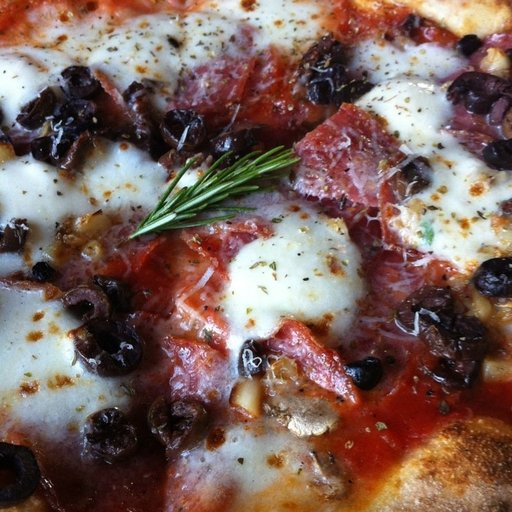

In [ ]:
#getting the image
import random
from PIL import Image
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image = random.choice(image_path_list)
image_class = random_image.parent.stem #ekkadi undi image class vasthadi like (pizza/steak/sushi)
img = Image.open(random_image)
#print the meta data )
print(image_path_list)
print(image_class)
img

In [ ]:
#transforing ourd ata into tensors
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

data_transfrom= transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5)

])

In [ ]:
import matplotlib.pyplot as plt


# [**ELA FUNCTION RAYATAM NERCHUKOVALI**]

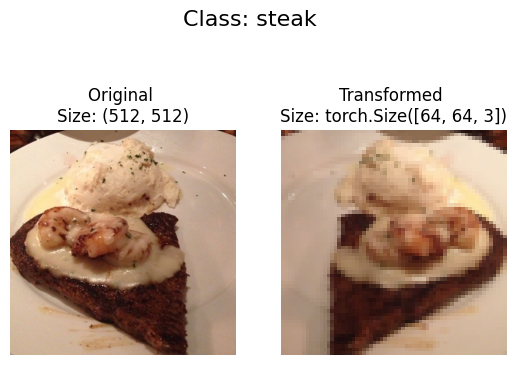

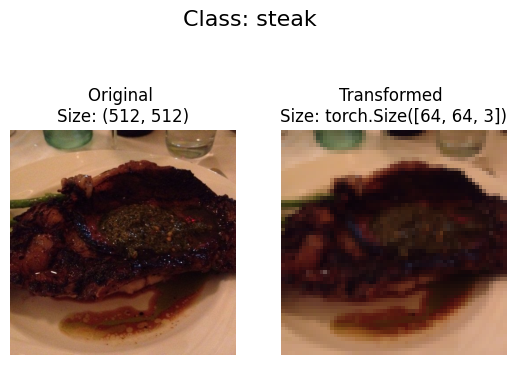

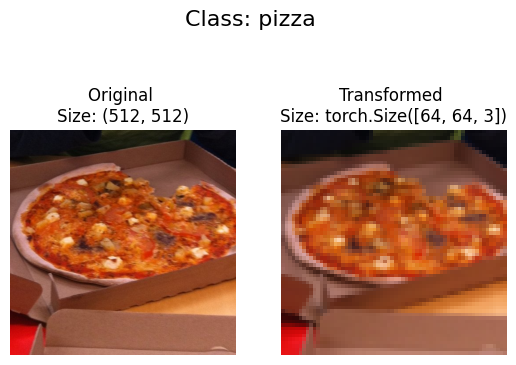

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transfrom,
                        n=3)

In [ ]:
#laoding image
from torchvision import datasets
train_data= datasets.ImageFolder(root=train_dir,
                                 transform= data_transfrom,
                                target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transfrom)
print(train_data)
print(test_data)

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
           )
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
           )


In [ ]:
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dic= train_data.class_to_idx
class_dic

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
from torch.utils.data import DataLoader
train_dataloader= DataLoader(
    dataset=train_data,
    batch_size=1,
    shuffle=True,
    num_workers=1,

)
test_dataloader= DataLoader(
    dataset=test_data,
    batch_size=1,
    shuffle=True,
    num_workers=1
)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e7052b07ca0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e7052b07a30>)

In [ ]:
from typing import List

In [ ]:
def display_image(dataset: torch.utils.data.Dataset,
                  classes: List[str]=None,
                  n: int=10,
                  display_shape: bool=True,
                  seed: int=None):
  if n>10:
    n=10
    display_shape=False
    print("This is not possible")
  if seed:
    random.seed(seed)

  random_sample_idx= random.sample(range(len(dataset)), k=n)
  plt.figure(figsize=(16,16))
  for i, targ_sample  in enumerate (random_sample_idx):
    targ_image, targ_label= dataset[targ_sample][0] , dataset[targ_sample][1]

    targ_img_adj= targ_image.permute(1,2,0)


    plt.subplot(1,n,i+1)
    plt.imshow(targ_img_adj)
    plt.axis("off")
    if classes:
       title= f"class:{classes[targ_label]}"
       if display_shape:
        title = title+f"\nshape:{targ_img_adj.shape}"

    plt.title(title)

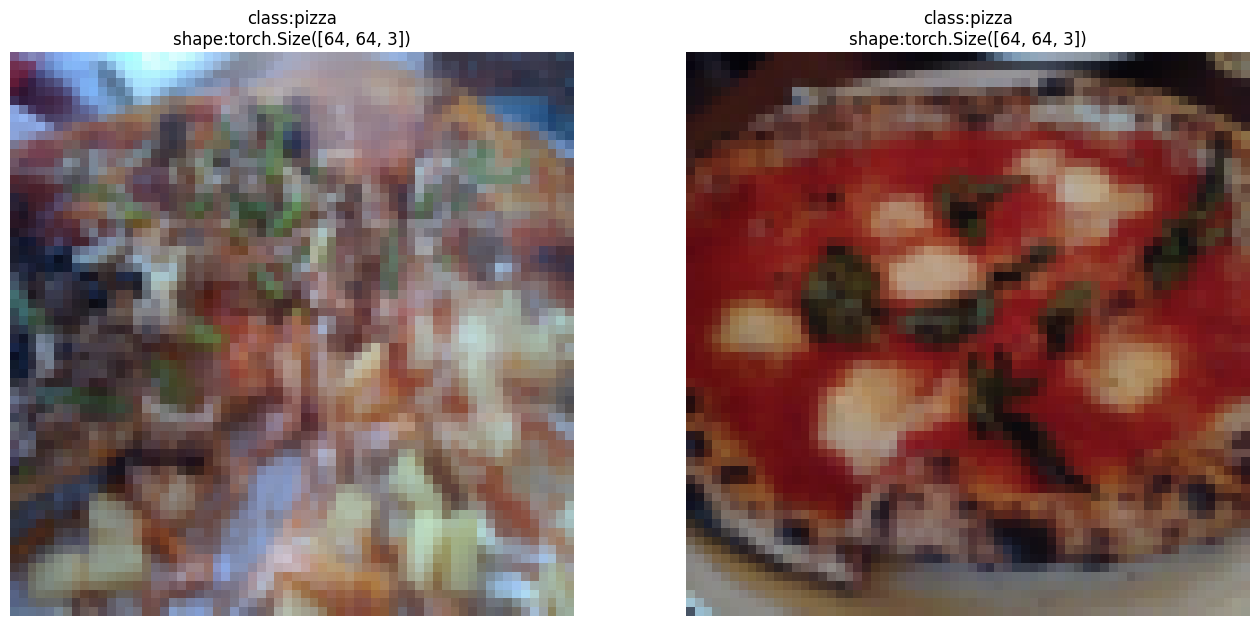

In [ ]:
display_image(train_data,
              n=2,
              classes=class_names,
              seed=None)

In [ ]:
train_dataloader_custom= DataLoader(dataset=train_data,
                                    batch_size=1,
                                    num_workers=1,
                                    shuffle=True)
test_dataloader_custom= DataLoader(dataset=test_data,
                                   batch_size=1,
                                   num_workers=1,
                                   shuffle=True)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7e70509de320>,
 <torch.utils.data.dataloader.DataLoader at 0x7e70509dee90>)

In [ ]:
#introducing more data augmentation parameter
from torchvision import transforms
train_transfrom= transforms.Compose([
    transforms.Resize((224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform= transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])
train_transfrom, test_transform

(Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
     TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
     ToTensor()
 ),
 Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
     ToTensor()
 ))

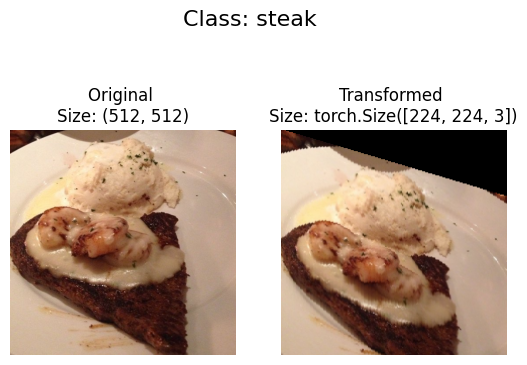

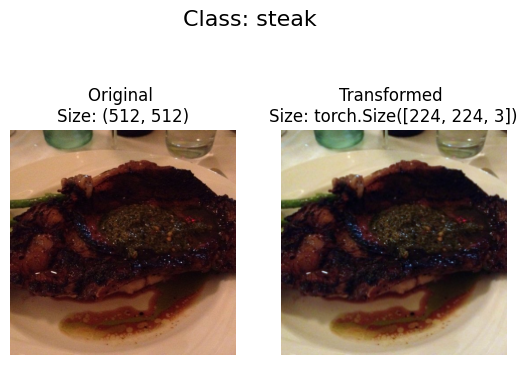

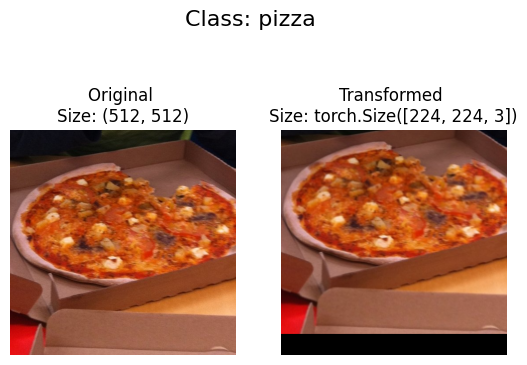

In [ ]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transfrom,
    n=3)


In [ ]:
simple_transform=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

#Model Creation

In [ ]:
from torchvision import datasets
train_simple_data= datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_simple_data= datasets.ImageFolder(root=test_dir, transform=simple_transform)

#turning data into dataloaders
import os
from torch.utils.data import DataLoader
#batch size and num_workers
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()
print(f"Creating dataloader with {NUM_WORKERS} of Batch_Size:{BATCH_SIZE}")

#creating dataloaders
train_dataloader_simple = DataLoader(train_simple_data,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_simple_data,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)
train_dataloader_simple, test_dataloader_simple

Creating dataloader with 2 of Batch_Size:32


(<torch.utils.data.dataloader.DataLoader at 0x7e7050960490>,
 <torch.utils.data.dataloader.DataLoader at 0x7e705093b310>)

In [ ]:
class TinyCNN(nn.Module):
  def __init__(self,input_shape:int, hidden_units: int, output_shape: int) ->None:
    super().__init__()
    self.conv_block1=nn.Sequential(
      nn.Conv2d(
          in_channels=input_shape,
          out_channels=hidden_units,
          kernel_size=3,
          stride=2,
          padding=1
      ),
      nn.ReLU(),
      nn.Conv2d(
          in_channels=hidden_units,
          out_channels=hidden_units,
          kernel_size=3,
          stride=2,
          padding=1
      ),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,
                 stride=2)
    )
    self.conv_block2=nn.Sequential(
        nn.Conv2d(hidden_units,hidden_units,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units,output_shape,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape)
    )
    def forward(self, x: torch.Tensor):
      x=self.conv_block1(x)
      x=self.conv_block2(x)
      x=self.classifer(x)
      return x

torch.manual_seed(42)
model_0=TinyCNN(input_shape=3,
                hidden_units=10,
                output_shape=len(train_data.classes)).to(device)
model_0

TinyCNN(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model_0, input_size=[1,3,64,64])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1362 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1622 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1153 | train_acc: 0.2930 | test_loss: 1.1695 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.2891 | test_loss: 1.1343 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0990 | train_acc: 0.2930 | test_loss: 1.1434 | test_acc: 0.1979
Total training time: 18.600 seconds


In [ ]:
from typing import Dict

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

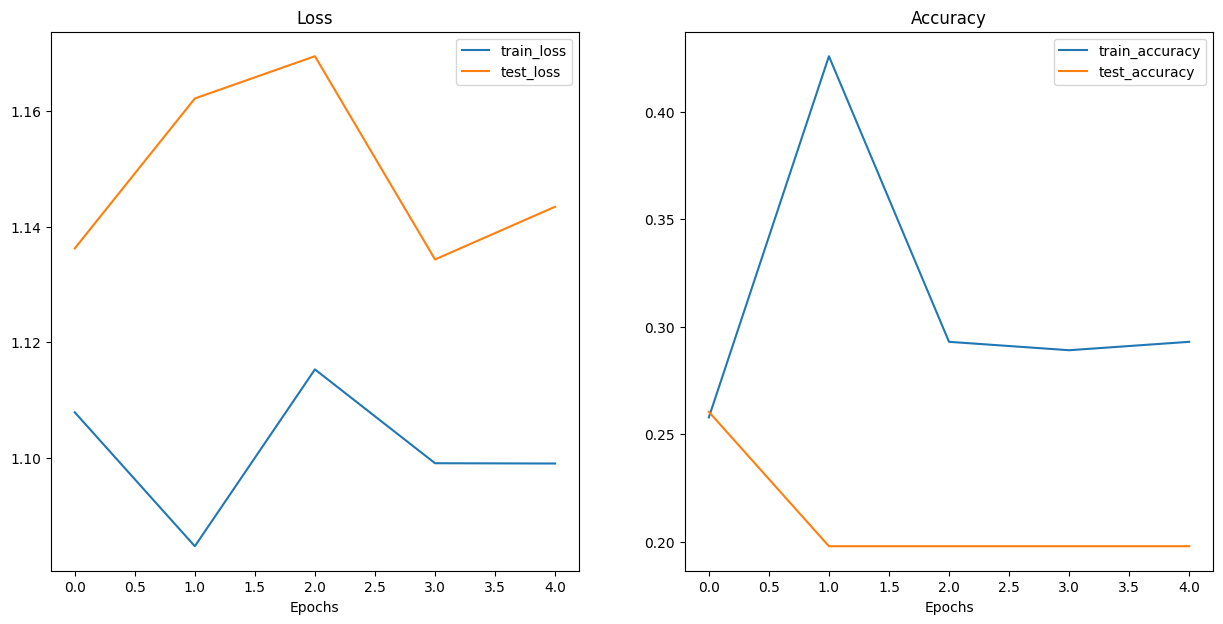

In [ ]:
plot_loss_curves(model_0_results)

In [ ]:
from torchvision import transforms

In [ ]:
#model 1 augmeneted model
train_data_augmeneted= transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_data_augemeneted = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])


In [ ]:
train_data_augemt= datasets.ImageFolder(train_dir,transform=train_data_augmeneted)
test_data_simple= datasets.ImageFolder(test_dir, transform=test_data_augemeneted)
train_data_augemt, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
#turning datasets into dataloaders
import os
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()
torch.manual_seed(42)

train_dataloader_augmented=DataLoader(train_data_augemt,
                                      batch_size=BATCH_SIZE,
                                      shuffle=True,
                                      num_workers=NUM_WORKERS)
test_dataloader_augemented = DataLoader(test_simple_data,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)
train_dataloader_augmented, test_dataloader_augemented

(<torch.utils.data.dataloader.DataLoader at 0x7e705093b910>,
 <torch.utils.data.dataloader.DataLoader at 0x7e7052acd4e0>)

In [ ]:
torch.manual_seed(42)
model_1= TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data_augemt.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 100

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.8f} seconds")

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1076 | train_acc: 0.2500 | test_loss: 1.1062 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0791 | train_acc: 0.4258 | test_loss: 1.1387 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0810 | train_acc: 0.4258 | test_loss: 1.1696 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1292 | train_acc: 0.3047 | test_loss: 1.1625 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0899 | train_acc: 0.4258 | test_loss: 1.1482 | test_acc: 0.2604
Epoch: 6 | train_loss: 1.0953 | train_acc: 0.3047 | test_loss: 1.1437 | test_acc: 0.2604
Epoch: 7 | train_loss: 1.0874 | train_acc: 0.4023 | test_loss: 1.1391 | test_acc: 0.1979
Epoch: 8 | train_loss: 1.1062 | train_acc: 0.2930 | test_loss: 1.1491 | test_acc: 0.1979
Epoch: 9 | train_loss: 1.1202 | train_acc: 0.3281 | test_loss: 1.1534 | test_acc: 0.3021
Epoch: 10 | train_loss: 1.0744 | train_acc: 0.5234 | test_loss: 1.0900 | test_acc: 0.3220
Epoch: 11 | train_loss: 1.0563 | train_acc: 0.4453 | test_loss: 1.0569 | test_acc: 0.5246
Epoch: 12 | train_l

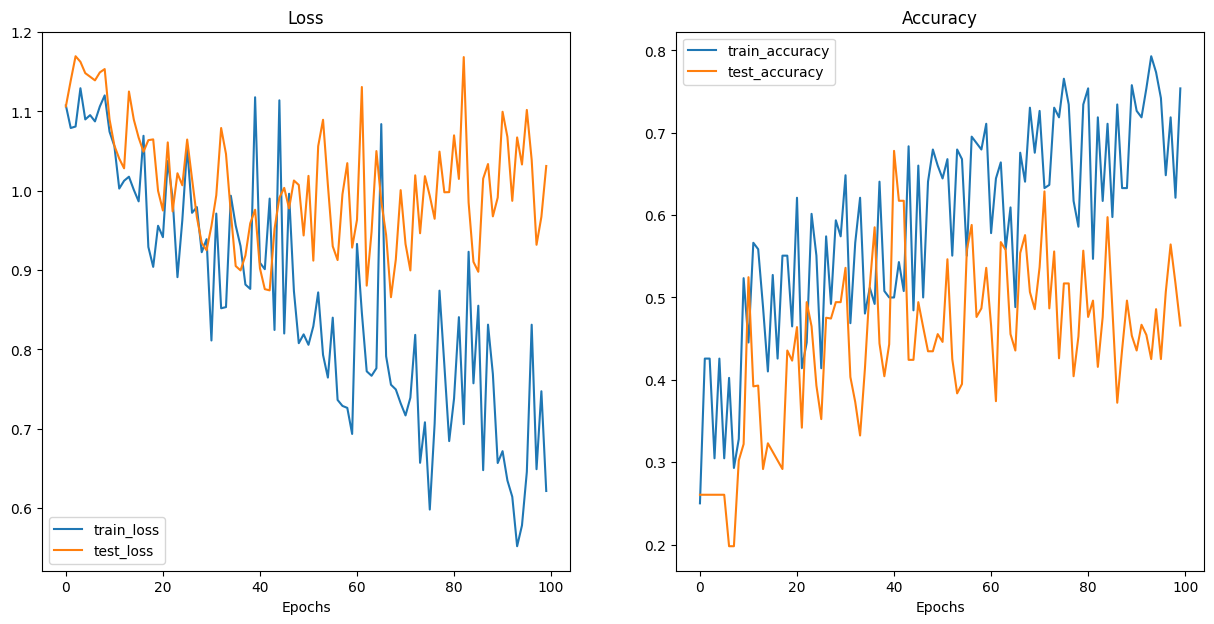

In [ ]:
plot_loss_curves(model_1_results)

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.107836,0.257812,1.136208,0.260417
1,1.084645,0.425781,1.162171,0.197917
2,1.115261,0.292969,1.169489,0.197917
3,1.099015,0.289062,1.134302,0.197917
4,1.098965,0.292969,1.143424,0.197917


ValueError: ignored

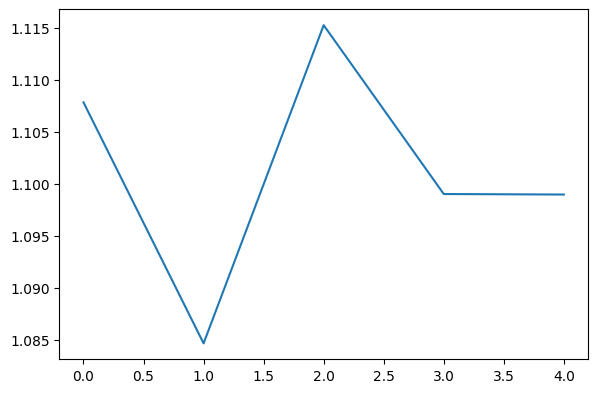

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
image_path_1= "/content/download.jpeg"

import torchvision
custom_image_uint8= torchvision.io.read_image(str(image_path_1))
print(f"The image tensor is :{custom_image_uint8}")
print(f"The size of image is :{custom_image_uint8}")
print(f"The image data type is :{custom_image_uint8}")


RuntimeError: ignored

In [ ]:
# Try to make a prediction on image in uint8 format (this will error)
model_1.eval()
with torch.inference_mode():
    model_1(custom_image_uint8.to(device))

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(image_path_1)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

In [ ]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed)

In [ ]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.to(device))

In [ ]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

In [ ]:
custom_image_pred

In [ ]:
probs= torch.softmax(custom_image_pred, dim=1)
probs

In [ ]:
final_ans= torch.argmax(probs)
final_ans

In [ ]:
idx_to_label= class_names[final_ans.cpu()]
idx_to_label

In [ ]:
#making all steps in one go
def plot_pred_image(model: torch.nn.Module,
                    image_path : str,
                    class_names: List[str]=None,
                    transform=None,
                    device:torch.device=None):
  target_image=torchvision.io.read_image(str(image_path)).type(torch.float32)
  target_image=target_image/255
  if transform:
    target_image=transform(target_image)
  model.to(device)
  model.eval()
  with torch.inference_mode():
    target_image=target_image.unsqueeze(dim=0)
    target_image_pred= model(target_image.to(device))
    target_image_probs= torch.softmax(target_image_pred, dim=1)
  target_image_label= torch.argmax(target_image_probs, dim=1)
  plt.imshow(target_image.squeeze().permute(1,2,0))
  if class_names:
    title=f"Pred:{class_names[target_image_label.cpu()]}| Pred: {target_image_label.max().cpu():.3f}"
  else:
    title=f"Pred:{target_image_label}| Pred:{target_image_label.max().cpu():.3f}"
  plt.title(title)
  plt.axis("off")

In [ ]:
image_path="/content/download (1).jpeg"


In [ ]:
plot_pred_image(model=model_1,
                image_path=image_path,
                class_names=class_names,
                transform=custom_image_transform,
                device=device)

NameError: ignored